# Importing Libraries and Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# map each city to its code
city_code = {'Seattle': 'KSEA', 'Los Angeles': 'KCQT', 'Phoenix': 'KPHX', 'Houston': 'KHOU', 'Chicago': 'KMDW',
             'Indianapolis': 'KIND', 'Charlotte': 'KCLT', 'New York': 'KNYC', 'Philadelphia': 'KPHL', 'Jacksonville': 'KJAX'}

In [3]:
# load from the github repo the data of each city and save the data of each city into a pandas dataframe
# save all data in a dictionary which maps each city to its dataframe
link = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/'
city_data = {city: pd.read_csv(link+code+'.csv') for city, code in city_code.items()}

# Exploring and Checking the Datasets

In [4]:
# check the shape of each dataframe
for city, data in city_data.items():
    print(city, ':', data.shape, end=' ')

Seattle : (365, 13) Los Angeles : (365, 13) Phoenix : (365, 13) Houston : (365, 13) Chicago : (365, 13) Indianapolis : (365, 13) Charlotte : (365, 13) New York : (365, 13) Philadelphia : (365, 13) Jacksonville : (365, 13) 

In [5]:
list(city_data['Los Angeles'].columns)

['date',
 'actual_mean_temp',
 'actual_min_temp',
 'actual_max_temp',
 'average_min_temp',
 'average_max_temp',
 'record_min_temp',
 'record_max_temp',
 'record_min_temp_year',
 'record_max_temp_year',
 'actual_precipitation',
 'average_precipitation',
 'record_precipitation']

In [6]:
# convert each date to a date object
# check all dates are betwen July 2014 and June 2015
for city, data in city_data.items():
    city_data[city]['date'] = pd.to_datetime(city_data[city]['date']).apply(lambda x: x.date())
    print(city, ':', data.date.min(), data.date.max())

Seattle : 2014-07-01 2015-06-30
Los Angeles : 2014-07-01 2015-06-30
Phoenix : 2014-07-01 2015-06-30
Houston : 2014-07-01 2015-06-30
Chicago : 2014-07-01 2015-06-30
Indianapolis : 2014-07-01 2015-06-30
Charlotte : 2014-07-01 2015-06-30
New York : 2014-07-01 2015-06-30
Philadelphia : 2014-07-01 2015-06-30
Jacksonville : 2014-07-01 2015-06-30


In [7]:
# check for any missing value
for city, data in city_data.items():
    print(city, ":", end=" ")
    num_missing = sum(sum(data[col].isnull()) for col in data.columns)
    check = num_missing == 0
    print(int(check)*'No missing values' + int(1-check)*'There are {} missing values'.format(num_missing))

Seattle : No missing values
Los Angeles : No missing values
Phoenix : No missing values
Houston : No missing values
Chicago : There are 2 missing values
Indianapolis : No missing values
Charlotte : No missing values
New York : No missing values
Philadelphia : No missing values
Jacksonville : No missing values


In [8]:
# check which columns in chicago dataset have the two missing values
print([col for col in city_data['Chicago'].columns if sum(city_data['Chicago'][col].isnull())>0])

['record_min_temp_year', 'record_max_temp_year']


In [9]:
# for now, we leave the two values empty until we need these two columns
# we can check the website source to get these two missing values, when needed

In [10]:
col_temp = ['actual_mean_temp', 'actual_min_temp', 'actual_max_temp', 'average_min_temp', 'average_max_temp', 'record_min_temp',
            'record_max_temp']
col_prec = ['actual_precipitation', 'average_precipitation', 'record_precipitation']

In [11]:
'''

check that the values of temperature, precipitation and year fall within a range of reasonable values 
a) check the minimum value of any temperature column is not less than -70 F 
   where -70 F was the coldest temperature ever recorded in the USA
b) check the maximum value of any temperature column is not greater than 134 F
   where 134 F highest temperature ever recorded in the USA
c) check any year is between 1870 and 2015
d) check any precipitation is between 0 and 15
'''

for city, data in city_data.items():

    d = data.describe()

    check_min_temp = (sum(d.loc['min', col] >= -70 for col in col_temp)) == len(col_temp)
    check_min_prec = (sum(d.loc['min', col] >= 0 for col in col_prec)) == len(col_prec)
    check_min_year = d.loc['min', 'record_min_temp_year'] >= 1870 and d.loc['min',
                                                                            'record_max_temp_year'] >= 1870

    check_max_temp = (sum(d.loc['max', col] <= 134 for col in col_temp)) == len(col_temp)
    check_max_prec = (sum(d.loc['max', col] <= 15 for col in col_prec)) == len(col_prec)
    check_max_year = d.loc['max', 'record_min_temp_year'] <= 2015 and d.loc['max',
                                                                            'record_max_temp_year'] <= 2015

    check_min = check_min_temp and check_min_prec and check_min_year
    check_max = check_max_temp and check_max_prec and check_max_year

    print(city, ":", int(check_min and check_max)*"No issues")

Seattle : No issues
Los Angeles : No issues
Phoenix : No issues
Houston : No issues
Chicago : No issues
Indianapolis : No issues
Charlotte : No issues
New York : No issues
Philadelphia : No issues
Jacksonville : No issues


# Unusual Warm Days for each City

In [12]:
# a. find the number of days where the actual maximum, minimum or mean temperatures were greater than the 
# average maximal temperature for each city

In [13]:
num_days = []

for city, data in city_data.items():
    # added 10 to find the number of days where a significant deviation from the average maximal temperature was observed
   
    ndays_max = sum(data['actual_max_temp'] >  10 + data['average_max_temp']) 
    ndays_mean = sum((data['actual_mean_temp'] > data['average_max_temp']))
    ndays_min = sum((data['actual_min_temp'] > data['average_max_temp']))
    num_days.append([city, ndays_max, ndays_mean, ndays_min])
    
city_warm_num = pd.DataFrame(num_days, columns=['city', 'num_max', 'num_mean', 'num_min'])

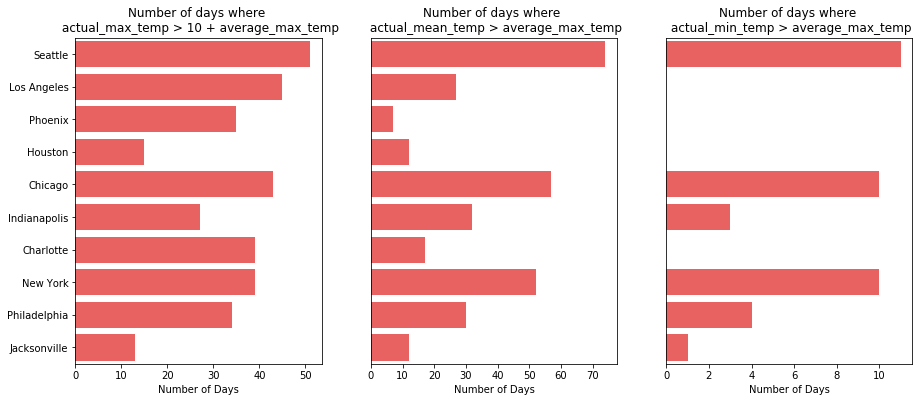

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.barplot(x='num_max', y='city', data=city_warm_num, color='red', alpha=0.7, ax=axes[0])
sns.barplot(x='num_mean', y='city', data=city_warm_num, color='red', alpha=0.7, ax=axes[1])
sns.barplot(x='num_min', y='city', data=city_warm_num, color='red', alpha=0.7, ax=axes[2])

axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('')
for ax in axes[1:]:
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('')
    ax.set_yticks([])

axes[0].set_title('Number of days where \n actual_max_temp > 10 + average_max_temp')
axes[1].set_title('Number of days where \n actual_mean_temp > average_max_temp')
axes[2].set_title('Number of days where \n actual_min_temp > average_max_temp')
fig.savefig('barplotred.png')
plt.show()

In [15]:
# b. find the number of days where a new high temperature record was set for each city

In [16]:
num_days_record = []

for city, data in city_data.items():
    num_days_record.append([city, int(sum(data['actual_max_temp'] == data['record_max_temp']))])

city_days_record = pd.DataFrame(num_days_record, columns=['city', 'num_record'])

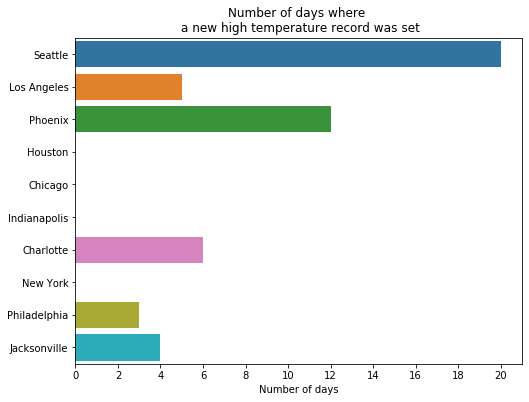

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x='num_record', y='city', data=city_days_record)
axes.set_xlabel('Number of days')
axes.set_ylabel("")
axes.set_title("Number of days where \n a new high temperature record was set")
axes.set_xticks(range(0, 21, 2))
fig.savefig('barplotrec.png')
plt.show()

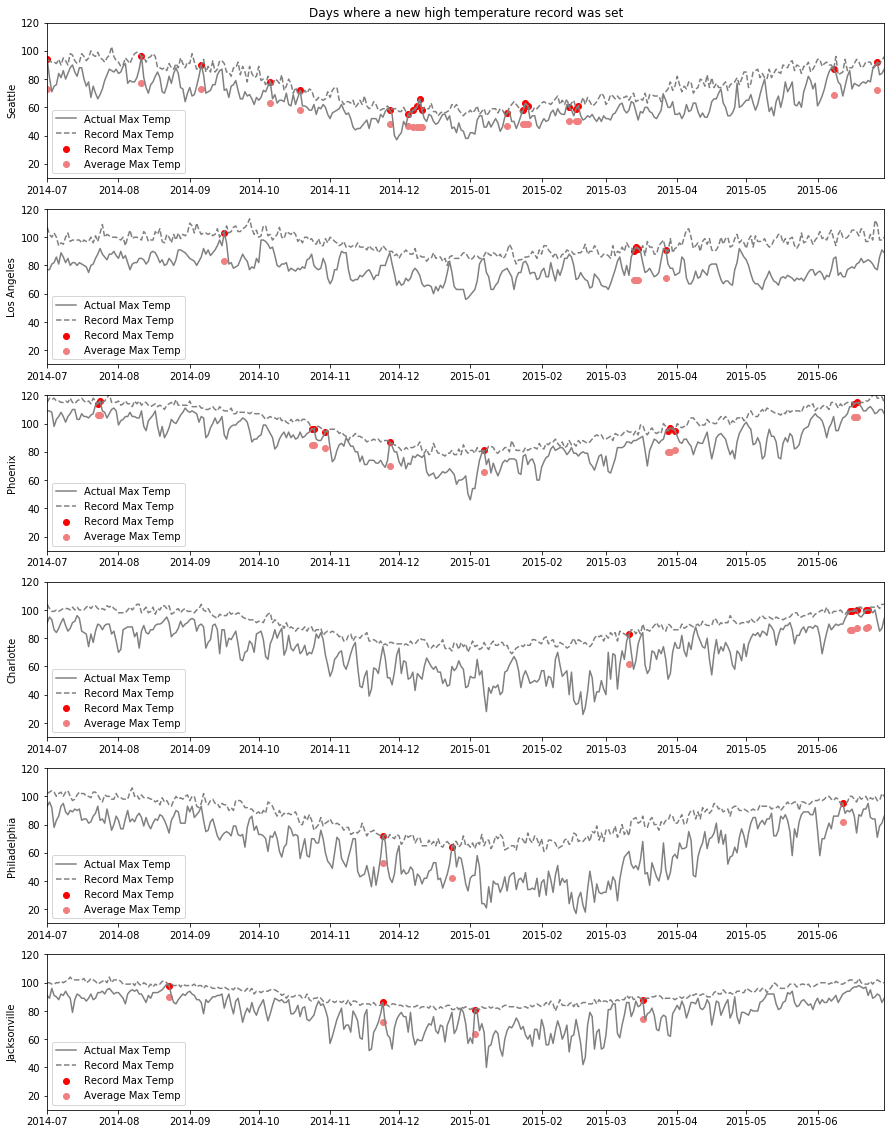

In [18]:
'''
For the cities where a new high temperature record was set, 
indicate where those days happened on the time series of the daily actual max temperature 
'''
fig, axes = plt.subplots(6, 1, figsize=(15, 20))

for i, city in enumerate(['Seattle', 'Los Angeles', 'Phoenix', 'Charlotte', 'Philadelphia', 'Jacksonville']):
    data = city_data[city]
    sub_data = data.loc[data['actual_max_temp'] == data['record_max_temp'], ['date', 'record_max_temp', 'average_max_temp']]
    axes[i].plot(data.date, data.actual_max_temp, color='grey', label='Actual Max Temp')
    axes[i].plot(data.date, data.record_max_temp, color='grey', linestyle='--',label='Record Max Temp')
    axes[i].scatter(sub_data.date, sub_data.record_max_temp, color='red', label='Record Max Temp')
    axes[i].scatter(sub_data.date, sub_data.average_max_temp, color='lightcoral', label='Average Max Temp')
    axes[i].set_xlim(city_data[city].date.min(), city_data[city].date.max())
    axes[i].set_ylim(10, 120)
    axes[i].legend()
    axes[i].set_ylabel(city)
axes[0].set_title('Days where a new high temperature record was set')
fig.savefig('tsh.png')
plt.show()

# Unusual Cold Days for each City

In [19]:
# a. find the number of days where the actual maximum, minimum or mean temperatures were less than the 
# average minimum temperature for each city

In [20]:
num_days = []

for city, data in city_data.items():
    # subtracted 10 to find the number of days where a significant deviation
    # from the average maximal temperature was observed
    ndays_min = sum(data['actual_min_temp'] < data['average_min_temp']-10)
    ndays_mean = sum((data['actual_mean_temp'] < data['average_min_temp']))
    ndays_max = sum((data['actual_max_temp'] < data['average_min_temp']))
    num_days.append([city, ndays_min, ndays_mean, ndays_max])

city_cold_num = pd.DataFrame(num_days, columns=['city', 'num_min', 'num_mean', 'num_max'])

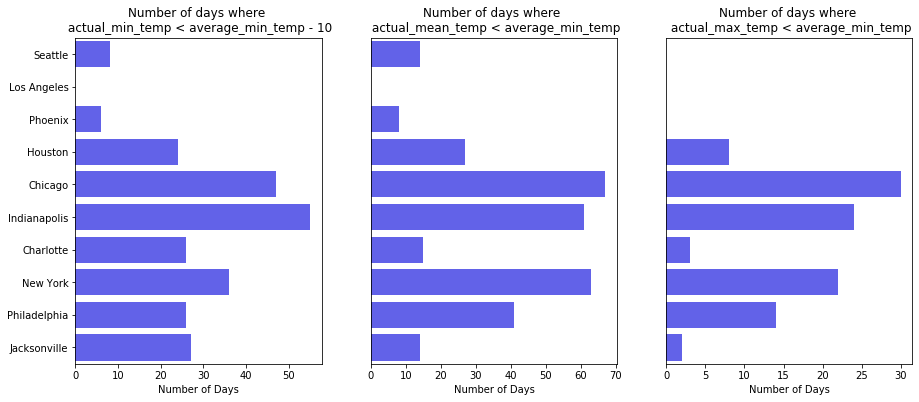

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.barplot(x='num_min', y='city', data=city_cold_num, color='blue', alpha=0.7, ax=axes[0])
sns.barplot(x='num_mean', y='city', data=city_cold_num, color='blue', alpha=0.7, ax=axes[1])
sns.barplot(x='num_max', y='city', data=city_cold_num, color='blue', alpha=0.7, ax=axes[2])

axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('')
for ax in axes[1:]:
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('')
    ax.set_yticks([])

axes[0].set_title('Number of days where \n actual_min_temp < average_min_temp - 10')
axes[1].set_title(
    'Number of days where \n actual_mean_temp < average_min_temp')
axes[2].set_title('Number of days where \n actual_max_temp < average_min_temp')
fig.savefig('barplotblue.png')
plt.show()

In [22]:
# b. find the number of days where a new minimum temperature record was set for each city

In [23]:
num_days_record = []

for city, data in city_data.items():
    num_days_record.append([city, sum(data['actual_min_temp'] == data['record_min_temp'])])

city_days_record = pd.DataFrame(num_days_record, columns=['city', 'num_record'])

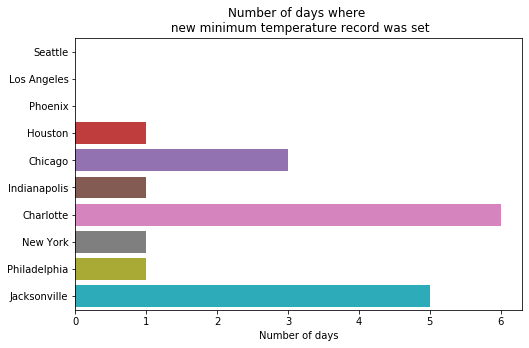

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(x='num_record', y='city', data=city_days_record)
axes.set_xlabel('Number of days')
axes.set_ylabel("")
axes.set_title("Number of days where \n new minimum temperature record was set")
fig.savefig('barplotrec2.png')
plt.show()

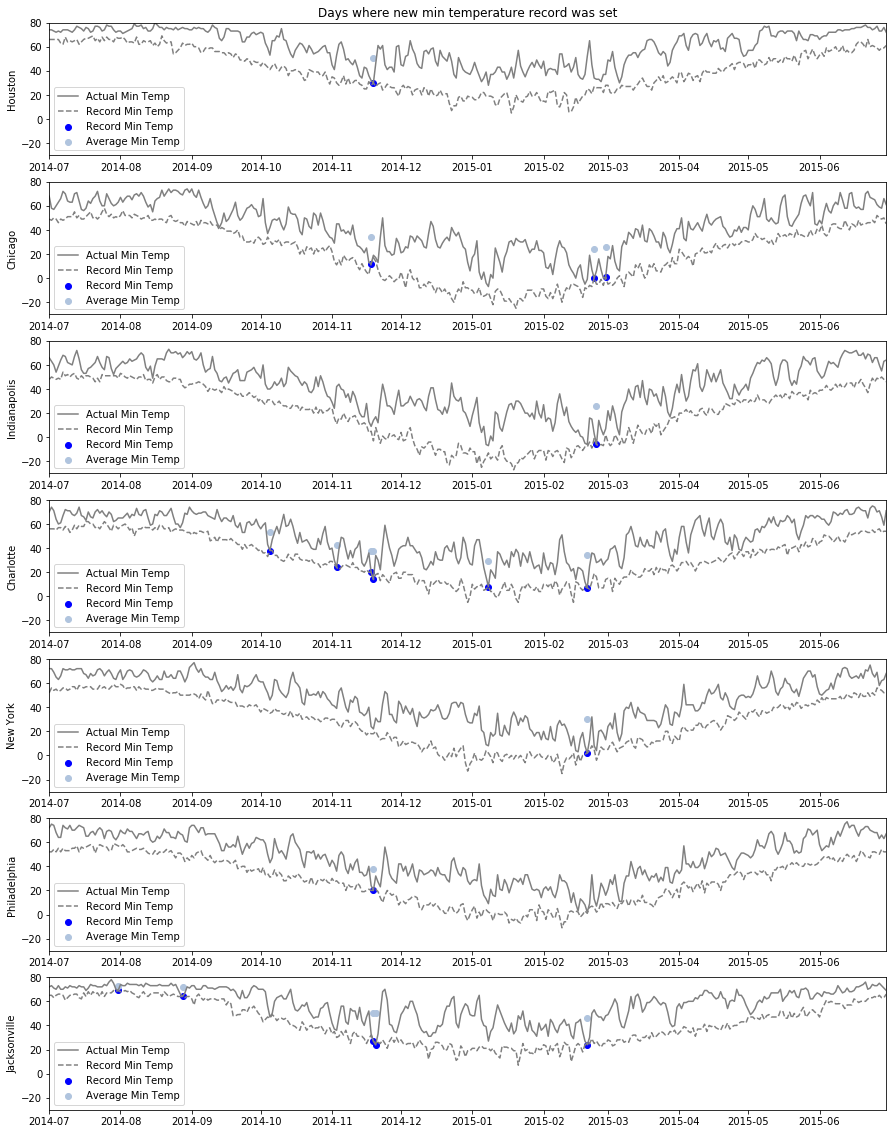

In [25]:
'''
For the cities where a new minimum temperature record was set, 
indicate where those days happened on the time series of the daily actual min temperature 
'''
fig, axes = plt.subplots(7, 1, figsize=(15, 20))

for i, city in enumerate(['Houston', 'Chicago', 'Indianapolis', 'Charlotte', 'New York', 'Philadelphia', 'Jacksonville']):
    data = city_data[city]
    sub_data = data.loc[data['actual_min_temp'] == data['record_min_temp'], ['date', 'record_min_temp', 'average_min_temp']]
    axes[i].plot(data.date, data.actual_min_temp, color='grey', label='Actual Min Temp')
    axes[i].plot(data.date, data.record_min_temp, color='grey', linestyle='--',label='Record Min Temp')
    axes[i].scatter(sub_data.date, sub_data.record_min_temp, color='blue', label='Record Min Temp')
    axes[i].scatter(sub_data.date, sub_data.average_min_temp, color='lightsteelblue', label='Average Min Temp')
    axes[i].set_xlim(city_data[city].date.min(), city_data[city].date.max())
    axes[i].set_ylim(-30, 80)
    axes[i].legend()
    axes[i].set_ylabel(city)
axes[0].set_title('Days where new min temperature record was set')
fig.savefig('tsr.png')
plt.show()

# Average Maximum and Minimum Temperature Values per Season

In [26]:
# map each day to a season depending on the month 
def to_season(dte):
    month = dte.month
    if month in (12,1,2):
        return "Winter"
    if month in (3,4,5):
        return "Spring"
    if month in (6,7,8):
        return "Summer"
    return "Fall"

# add season as a column for each city dataframe
for city in city_data:
    city_data[city]['season'] = city_data[city]['date'].apply(to_season)

In [27]:
'''
Here we want to compare the actual range vs the average range of temperatures for each season.
For each season, find the average of actual_max_temp, actual_min_temp, average_max_temp, average_temp.
Concat the results of all city in one data frame.
Using melt function, unpivot the obtained table from wide to long format. This is in order to use the catplot from
seaborn library.
'''

seasonal_range = pd.DataFrame()

for city, data in city_data.items():
    seasonal = data.groupby('season')[
        ['actual_min_temp', 'actual_max_temp', 'average_min_temp', 'average_max_temp']].mean().reset_index()
    seasonal['city'] = city
    seasonal_range = pd.concat([seasonal_range, seasonal])

seasonal_range = pd.melt(seasonal_range, ['season', 'city']).rename(
    columns={'variable': 'Average measurement per season', 'value': 'temperature'})

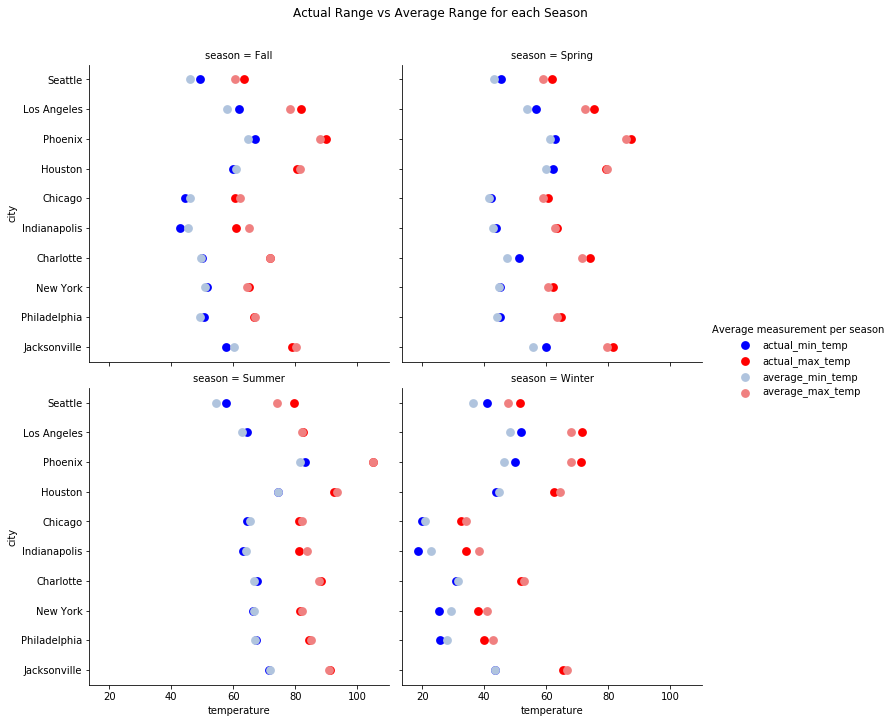

In [28]:
g= sns.catplot(y='city', x='temperature', hue='Average measurement per season', data=seasonal_range,
                  kind='point', join=False, palette=['blue', 'red', 'lightsteelblue', 'lightcoral'], col='season', col_wrap=2)
g.fig.suptitle('Actual Range vs Average Range for each Season')
plt.subplots_adjust(top=0.9)
g.savefig('catplot.png')
plt.show()

# Longest Period of Consecutive Warm (Cold) Days 

In [29]:
# a. warm days

num_cons_days = []

for city, data in city_data.items():
    mean_greater_avg = data.actual_mean_temp > data.average_max_temp
    max_period, current_period = 1, 0
    for cond in mean_greater_avg:
        if cond == 1:
            current_period += 1
        else:
            max_period = max(max_period, current_period)
            current_period = 0
    num_cons_days.append([city, max_period])

num_cons_days = pd.DataFrame(num_cons_days, columns=[
                             'City', 'Number of Consecutive Days'])

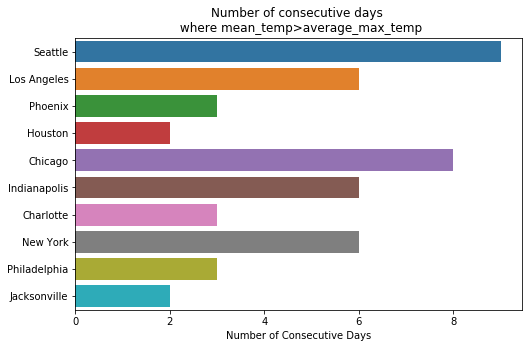

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(y='City', x='Number of Consecutive Days', data=num_cons_days)
ax.set_title("Number of consecutive days \n where mean_temp>average_max_temp")
ax.set_ylabel("")
fig.savefig('consh.png')
plt.show()

In [31]:
# b. cold days

num_cons_days = []

for city, data in city_data.items():
    mean_less_avg = data.actual_mean_temp < data.average_min_temp
    max_period, current_period = 1, 0
    for cond in mean_less_avg:
        if cond == 1:
            current_period += 1
        else:
            max_period = max(max_period, current_period)
            current_period = 0
    num_cons_days.append([city, max_period])

num_cons_days = pd.DataFrame(num_cons_days, columns=[
                             'City', 'Number of Consecutive Days'])

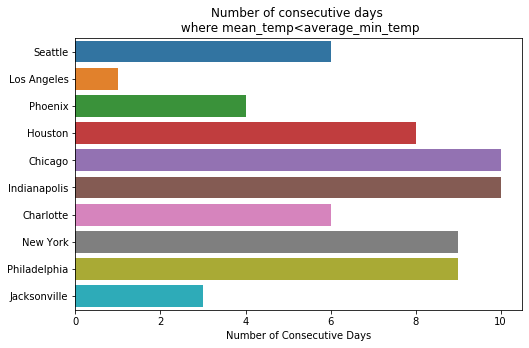

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(y='City', x='Number of Consecutive Days', data=num_cons_days)
ax.set_title("Number of consecutive days \n where mean_temp<average_min_temp")
ax.set_ylabel("")
plt.savefig('consm.png')
plt.show()